In [151]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [123]:
# loading the dataset to a Pandas DataFrame
creditdata = pd.read_csv("C:/Users/karth/Downloads/creditcard.csv")

In [124]:
creditdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


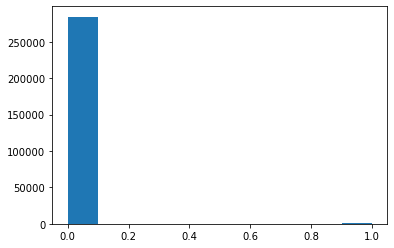

In [155]:
plt.hist(creditdata.Class)
plt.show()

In [125]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [126]:
# distribution of normal transactions & fraudulent transactions
creditdata["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [127]:
# checking the number of missing values in each column
creditdata.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [128]:
# separating the data for analysis
normal  = creditdata[creditdata.Class==0]
fraud = creditdata[creditdata.Class==1]

In [129]:
normal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
fraud.shape,normal.shape

((492, 31), (284315, 31))

In [131]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [132]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [133]:
#comparing
creditdata.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [134]:
#sampling
normal_sample = normal.sample(n = 492)

In [135]:
normal_sample.shape

(492, 31)

In [136]:
newdata = pd.concat([normal_sample,fraud],axis = 0)

In [137]:
newdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83250,59759.0,-2.749111,2.299567,-1.961110,-1.220255,1.009264,3.075246,-1.322179,2.671814,-0.422901,...,-0.253112,-1.044091,0.173080,0.972558,0.261820,0.115291,0.236440,0.045152,13.48,0
96030,65575.0,1.166262,-0.138493,0.594027,0.855883,-0.567500,-0.129830,-0.292329,0.100376,0.776717,...,-0.088394,-0.036057,-0.033281,0.117993,0.443193,0.442929,-0.004644,0.007916,12.94,0
18171,29261.0,1.096765,-0.073467,1.253898,1.709472,-0.632588,0.607659,-0.489872,0.239663,1.131583,...,-0.411410,-0.648225,0.082095,0.090281,0.455541,-0.510910,0.098256,0.028851,2.00,0
33422,37224.0,0.935406,-0.658217,1.742164,1.683263,-1.285683,1.268691,-1.250271,0.673416,1.645443,...,0.016468,0.410807,-0.093979,0.024328,0.395578,-0.211298,0.106221,0.028276,44.00,0
113777,73201.0,1.268326,0.383920,0.165194,0.606550,-0.127171,-0.844498,0.146775,-0.231353,-0.073430,...,-0.297031,-0.829776,0.068272,0.008896,0.290424,0.113072,-0.019305,0.030271,8.99,0


In [138]:
newdata["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [139]:
x = newdata.drop(columns = "Class",axis = 1)
y = newdata.Class

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify = y,random_state = 5)

In [141]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (738, 30) (246, 30)


In [142]:
model = LogisticRegression()

In [143]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

LogisticRegression()

In [144]:
y_pred = model.predict(x_train)

In [145]:
train_accuracy = accuracy_score(y_train,y_pred)

In [146]:
print("train_accuracy"":",train_accuracy)

train_accuracy: 0.9498644986449865


In [147]:
y_pred_t = model.predict(x_test)

In [148]:
test_accuracy = accuracy_score(y_test,y_pred_t)

In [149]:
print("test_accuracy"":",test_accuracy)

test_accuracy: 0.9349593495934959
